<a href="https://colab.research.google.com/github/ranishrocks/cs367-ai-lab/blob/main/lab%205/%20Lab5(Submission).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Modules


In [ ]:
# Import necessary libraries
!pip install hmmlearn
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from datetime import datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.3 MB/s eta 0:00:00



yfinance: Used to download historical stock data from Yahoo Finance.
numpy and pandas: Libraries for numerical computations and data manipulation.
matplotlib.pyplot: Used for plotting and visualizing the data.
hmmlearn: A library to model a Hidden Markov Model (HMM), specifically the Gaussian variant for continuous data like stock returns.
datetime: Handles date and time information.

# Data Collection and Preprocessing

In [ ]:
start_date = "2010-01-01"
end_date = "2023-12-31"
ticker = "AAPL"

data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


start_date and end_date: Define the time range for historical stock data.
ticker: The stock symbol for Apple ("AAPL"), which is used to fetch the stock data from Yahoo Finance.
yf.download: Downloads historical stock data (Open, High, Low, Close, Adjusted Close prices, and Volume) for the given stock ticker.


# Preprocessing the data


In [ ]:
data['Returns'] = data['Adj Close'].pct_change().dropna()
data.dropna(inplace=True)


pct_change(): Calculates the percentage change between successive adjusted closing prices, which represents daily returns. This is essential for understanding the day-to-day movement of the stock.
dropna(): Removes any rows with missing data, typically arising from calculating percentage change.

#  Gaussian Hidden Markov Model (HMM) Fitting

In [ ]:
n_hidden_states = 2
model = GaussianHMM(n_components=n_hidden_states, covariance_type="full", n_iter=1000)
model.fit(data[['Returns']].values)


GaussianHMM(covariance_type='full', n_components=2, n_iter=1000)

n_hidden_states: The number of hidden states in the model, assumed here to be 2 (representing two market regimes: high volatility and low volatility).
GaussianHMM: Initializes the Gaussian Hidden Markov Model with:
n_components=2: The number of hidden states.
covariance_type="full": Uses a full covariance matrix for modeling the hidden states.
n_iter=1000: The maximum number of iterations for the fitting process.
model.fit(): Trains the HMM model on the stock's return data. The model learns the underlying hidden states that explain the observed data.

#Predicting the hidden states:


In [ ]:
hidden_states = model.predict(data[['Returns']].values)


model.predict(): Predicts which hidden state (e.g., high volatility or low volatility) the stock was in for each day, based on the daily returns.

#  Interpretation and Inference


In [ ]:
means = model.means_
covariances = model.covars_
transition_matrix = model.transmat_

print("Means of each hidden state:", means)
print("Covariances (volatility) of each hidden state:", covariances)
print("Transition matrix between hidden states:", transition_matrix)


Means of each hidden state: [[ 0.00169311]
 [-0.00062757]]
Covariances (volatility) of each hidden state: [[[0.00014891]]

 [[0.0008443 ]]]
Transition matrix between hidden states: [[0.96285251 0.03714749]
 [0.1136232  0.8863768 ]]


means_: The mean returns for each hidden state. For example, one hidden state might have higher average returns (indicative of a bullish regime), while the other might have lower average returns (indicative of a bearish regime).
covars_: The covariance (volatility) for each hidden state, indicating how much daily returns fluctuate in each market regime.
transmat_: The transition matrix, which shows the probabilities of moving from one hidden state to another. For instance, it can indicate how likely it is for the market to switch from a high-volatility regime to a low-volatility one (and vice versa).

# Visualization

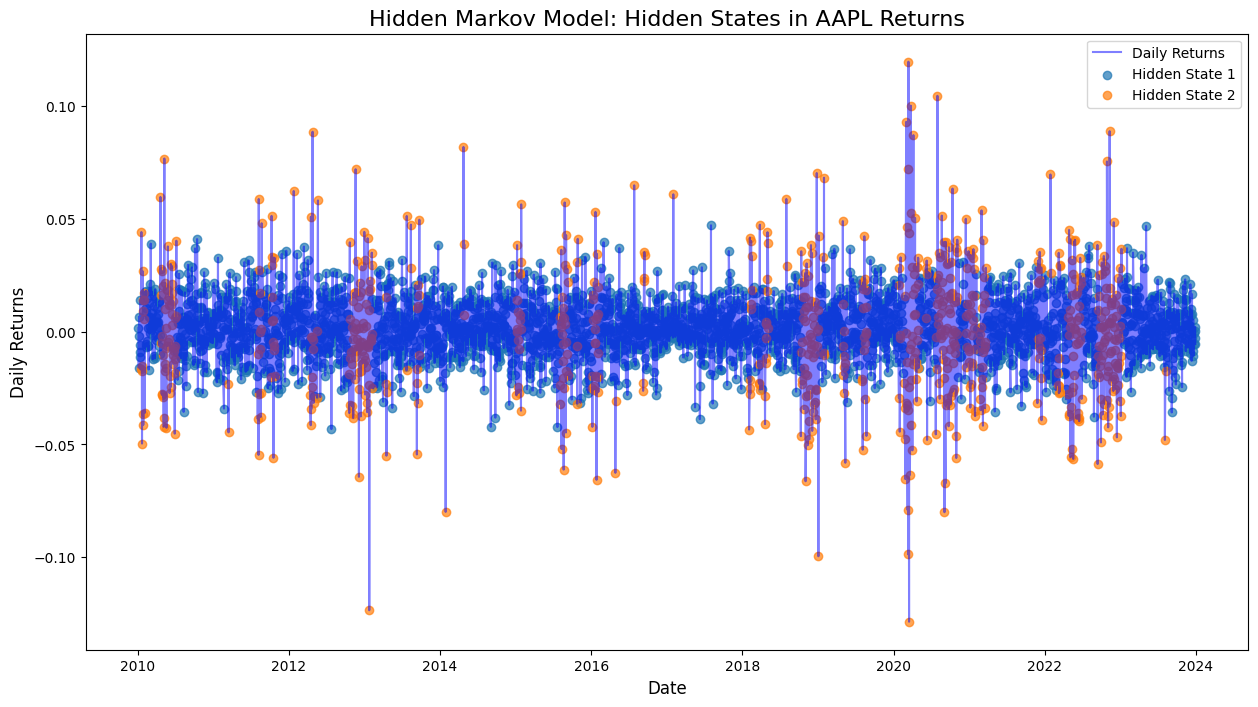

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['Returns'], label="Daily Returns", color='blue', alpha=0.5)

for i in range(n_hidden_states):
    state = (hidden_states == i)
    plt.scatter(data.index[state], data['Returns'][state], label=f"Hidden State {i + 1}", alpha=0.7)

plt.title(f"Hidden Markov Model: Hidden States in {ticker} Returns", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Returns", fontsize=12)
plt.legend(loc='best')
plt.show()


Visualization: This code plots the daily returns over time and color-codes them based on the predicted hidden states (market regimes). The hidden states are represented by different colors, helping to visualize the periods of high vs. low volatility.

# Conclusion and Future Prediction

In [ ]:
latest_return = data['Returns'].iloc[-1]
predicted_next_state = model.predict([[latest_return]])
print(f"Based on the latest return of {latest_return:.5f}, the predicted next hidden state is {predicted_next_state[0] + 1}.")


Based on the latest return of -0.00542, the predicted next hidden state is 1.


Future state prediction: The model predicts the likely hidden state for the next day based on the most recent observed return.

In [ ]:
next_state_probabilities = transition_matrix[predicted_next_state[0]]
print(f"Probabilities of transitioning to each hidden state from the current state: {next_state_probabilities}")


Probabilities of transitioning to each hidden state from the current state: [0.96285251 0.03714749]


Transition probabilities: Shows the probabilities of transitioning from the current state (predicted by the model) to other hidden states, which helps in forecasting the market regime for the next few days.